In [ ]:
pip install yfinance

In [5]:
#Let's start with importing some python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import yfinance as yf

yfinance : 
    A library to download financial market data from Yahoo Finance. 
    This can be used to download stock market data from India as well as other global markets.

Download the historical stock data for a specific company listed on the Indian stock market using yfinance library:

In [6]:
stock = 'RELIANCE.NS'

rel_data = yf.download(stock,start = '2022-08-01', end = '2023-01-18')

[*********************100%***********************]  1 of 1 completed


In [8]:
rel_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01 00:00:00+05:30,2519.149902,2587.750000,2507.600098,2574.850098,2567.121094,7245568
2022-08-02 00:00:00+05:30,2572.500000,2607.800049,2561.550049,2584.649902,2576.891602,6423115
2022-08-03 00:00:00+05:30,2600.000000,2610.000000,2567.449951,2606.350098,2598.526611,6576824
2022-08-04 00:00:00+05:30,2610.000000,2617.750000,2535.000000,2571.899902,2564.179932,6676577
2022-08-05 00:00:00+05:30,2576.000000,2578.800049,2526.949951,2534.000000,2526.393799,6434433


In [9]:
rel_data.shape

(116, 6)

In [10]:
rel_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
rel_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.974614,0.974254,0.942911,0.942997,-0.094683
High,0.974614,1.000000,0.966547,0.980243,0.980261,0.004506
Low,0.974254,0.966547,1.000000,0.965665,0.965846,-0.165694
Close,0.942911,0.980243,0.965665,1.000000,0.999678,-0.036051
Adj Close,0.942997,0.980261,0.965846,0.999678,1.000000,-0.037491
Volume,-0.094683,0.004506,-0.165694,-0.036051,-0.037491,1.000000


In [12]:
rel_data['Returns'] = rel_data['Adj Close'].pct_change()

In [13]:
rel_data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2022-08-01 00:00:00+05:30,2519.149902,2587.750000,2507.600098,2574.850098,2567.121094,7245568,NaN
2022-08-02 00:00:00+05:30,2572.500000,2607.800049,2561.550049,2584.649902,2576.891602,6423115,0.003806
2022-08-03 00:00:00+05:30,2600.000000,2610.000000,2567.449951,2606.350098,2598.526611,6576824,0.008396
2022-08-04 00:00:00+05:30,2610.000000,2617.750000,2535.000000,2571.899902,2564.179932,6676577,-0.013218
2022-08-05 00:00:00+05:30,2576.000000,2578.800049,2526.949951,2534.000000,2526.393799,6434433,-0.014736


Plot the Closing Price

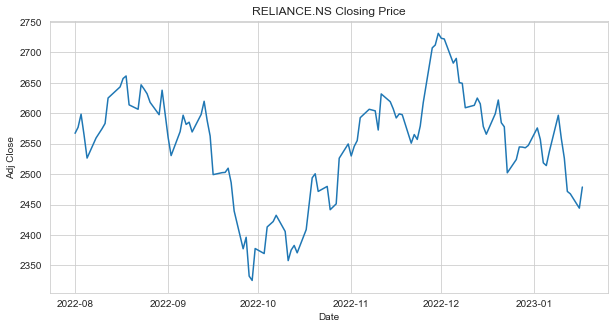

In [16]:
plt.figure(figsize = (10,5))
sns.lineplot(data = rel_data, x='Date', y = 'Adj Close')
plt.title(f'{stock} Closing Price')
plt.show()

Histogram Of Returns

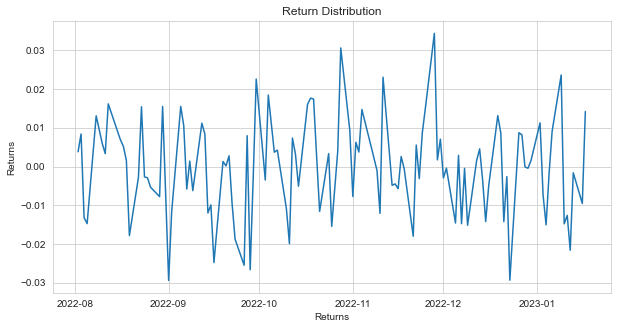

In [15]:
plt.figure(figsize = (10,5))
sns.lineplot(data = rel_data, x='Date', y = 'Returns')
plt.title('Return Distribution')
plt.xlabel('Returns')
plt.show()

<AxesSubplot:xlabel='Date'>

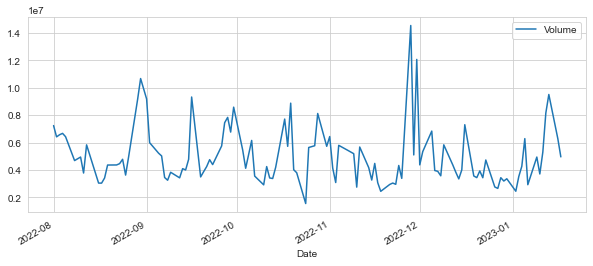

In [17]:
rel_data['Volume'].plot(legend = True, figsize = (10,4))

Stock Market Data Analysis

Stock Market Analysis and Prediction is the project related to Exploratory data analysis(EDA), Data visualization and Predictive analysis using data, provided by The Investors Exchange (IEX). 

We'll be answering the following questions along the way:

What was the change in price of the stock over time?

What was the daily return of the stock on average?

What was the moving average of the various stocks?

What was the correlation between different stocks' closing prices?

What was the correlation between different stocks' daily returns?


How much value do we put at risk by investing in a particular stock?

How can we attempt to predict future stock behavior?

In [19]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [20]:
# For reading stock data from the Investors Exchange (IEX)
import pandas_datareader as pdr
from datetime import datetime

Let's use iexfinanceThe Investors Exchange (IEX) and pandas to grab some data for some technology company stocks.

In [31]:
tech_stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [32]:
## SETUP END AND START TIMES FOR DATA LOAD
end = datetime.now()
end

datetime.datetime(2023, 2, 3, 14, 33, 50, 204479)

In [33]:
start = datetime(end.year -1, end.month, end.day)
start

datetime.datetime(2022, 2, 3, 0, 0)

In [34]:
import os

In [35]:
# For Loop for grabing iex finance data and setting as a dataframe
os.environ["IEX_API_KEY"] = "sk_5bdb6470e57d4819a152b9fc1c6508ff"

for stock in tech_stocks:
      stock_data = pdr.DataReader(stock,'iex',start,end, api_key=os.getenv('IEX_API_KEY'))

For loop for grabing iex finance data and setting as a dataframe.
Set DataFrame as the Stock Ticker

In [36]:
for stock in tech_stocks:
    globals()[stock] = pdr.DataReader(stock,'iex',start,end, api_key=os.getenv('IEX_API_KEY'))

In [37]:
tech_stocks

['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [38]:
AAPL.head()

,open,high,low,close,volume
date,,,,,
2022-02-03,174.48,176.240,172.12,172.90,89418074
2022-02-04,171.68,174.100,170.68,172.39,82465400
2022-02-07,172.86,173.946,170.95,171.66,77251204
2022-02-08,171.73,175.350,171.43,174.83,74829217
2022-02-09,176.05,176.650,174.90,176.28,71285038


In [39]:
AAPL.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,151.784809,153.893858,149.766108,151.903386,8.537220e+07
std,13.059928,12.941824,13.071203,13.030029,2.261787e+07
min,126.010000,127.770000,124.170000,125.020000,3.519586e+07
25%,142.110000,143.855000,139.950000,142.465000,7.018922e+07
50%,149.660000,151.570000,147.820000,150.430000,8.054616e+07
75%,162.655000,165.270000,159.790000,163.185000,9.374539e+07
max,178.550000,179.610000,176.700000,178.960000,1.826020e+08


In [40]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2022-02-03 to 2023-02-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    251 non-null    float64
 1   high    251 non-null    float64
 2   low     251 non-null    float64
 3   close   251 non-null    float64
 4   volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


In [41]:
GOOG.head()

,open,high,low,close,volume
date,,,,,
2022-02-03,145.29500,149.117720,142.2050,142.6505,56930140
2022-02-04,143.01700,144.535250,139.8175,143.0160,49224400
2022-02-07,143.70900,143.846495,138.6990,138.9380,44610740
2022-02-08,138.99125,139.837120,136.8730,139.2130,34255040
2022-02-09,140.84975,142.175500,140.3770,141.4530,28627160


In [42]:
MSFT.head()

,open,high,low,close,volume
date,,,,,
2022-02-03,309.490,311.230,299.96,301.25,43729972
2022-02-04,300.210,308.800,299.97,305.94,35096488
2022-02-07,306.170,307.840,299.90,300.95,28533286
2022-02-08,301.250,305.561,299.95,304.56,32421188
2022-02-09,309.865,311.930,307.39,311.21,31284671


In [43]:
AMZN.head()

,open,high,low,close,volume
date,,,,,
2022-02-03,141.738,144.248,138.333,138.846,225531360.0
2022-02-04,155.607,161.200,150.608,157.640,253455860.0
2022-02-07,158.520,162.691,157.250,157.936,102624380.0
2022-02-08,156.751,161.793,155.551,161.414,76040360.0
2022-02-09,162.874,163.835,160.250,161.190,68785600.0


In [44]:
age =23
globals()['age'] = 25
print("The age is", age)

The age is 25


# Let's see a historical view of the closing price

<AxesSubplot:xlabel='date'>

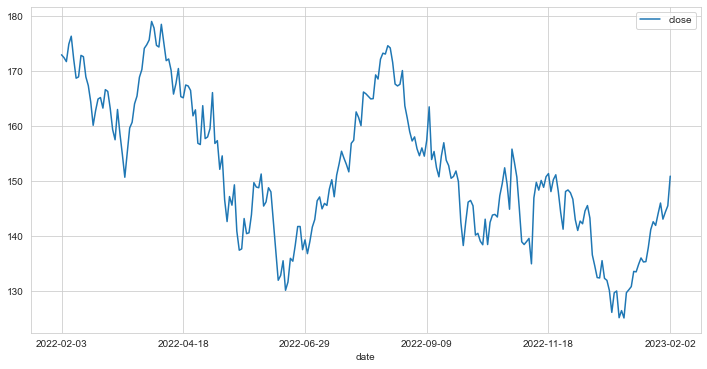

In [46]:
AAPL['close'].plot(legend = True,figsize = (12,6))

<AxesSubplot:xlabel='date'>

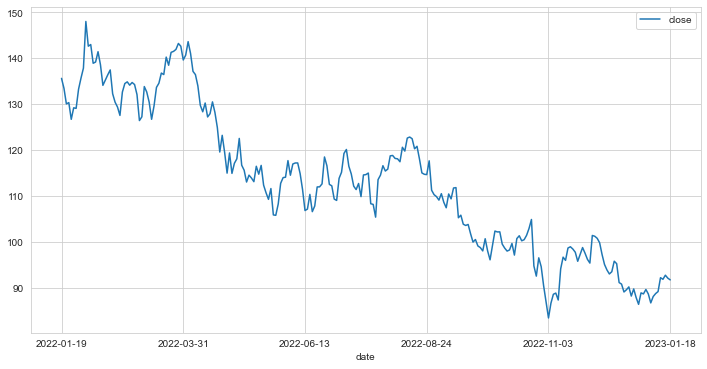

In [47]:
GOOG['close'].plot(legend = True,figsize = (12,6))

<AxesSubplot:xlabel='date'>

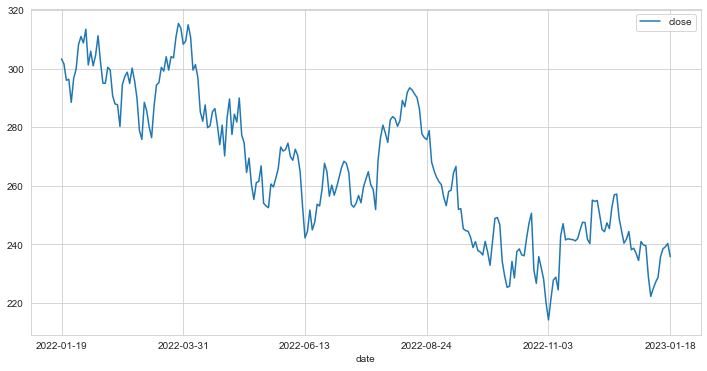

In [48]:
MSFT['close'].plot(legend = True,figsize = (12,6))

<AxesSubplot:xlabel='date'>

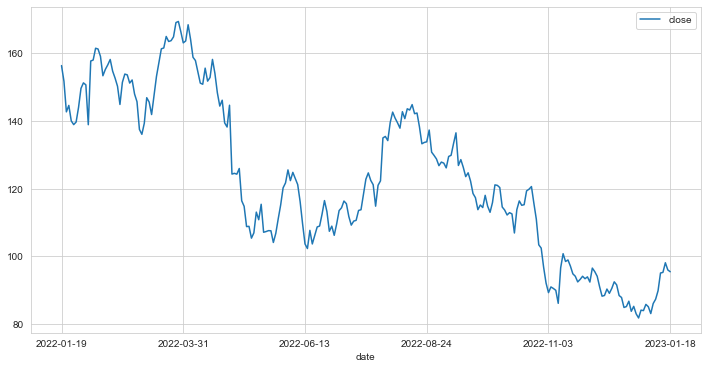

In [49]:
AMZN['close'].plot(legend = True,figsize = (12,6))

## Now let's plot the total volume of stock being traded each day over the past 5 years

<AxesSubplot:xlabel='date'>

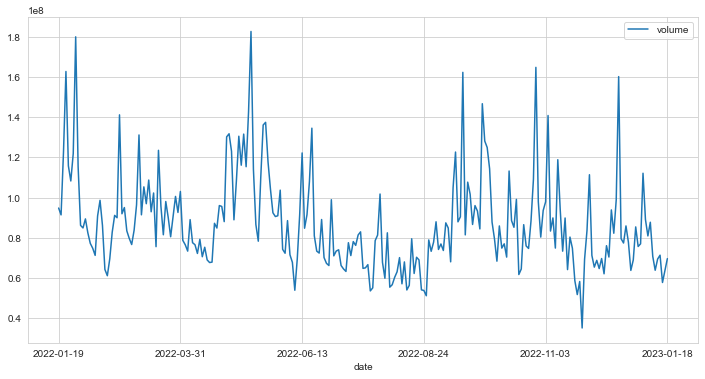

In [51]:
AAPL['volume'].plot(legend = True,figsize = (12,6))

<AxesSubplot:xlabel='date'>

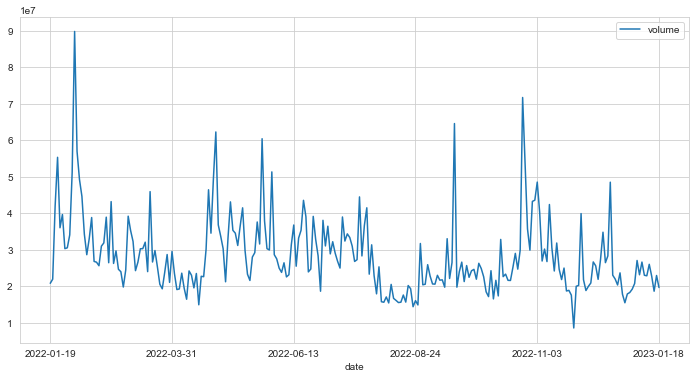

In [52]:
GOOG['volume'].plot(legend = True,figsize = (12,6))

<AxesSubplot:xlabel='date'>

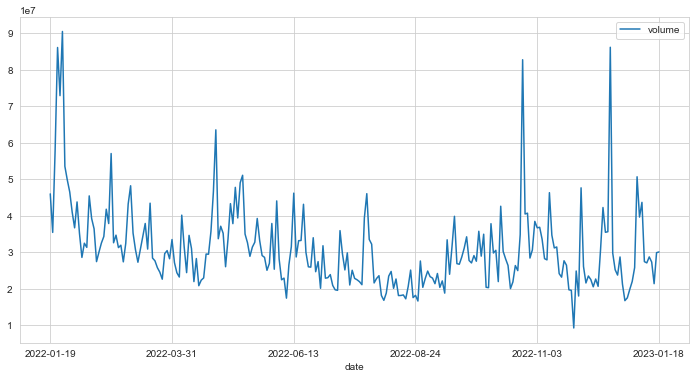

In [53]:
MSFT['volume'].plot(legend = True,figsize = (12,6))

<AxesSubplot:xlabel='date'>

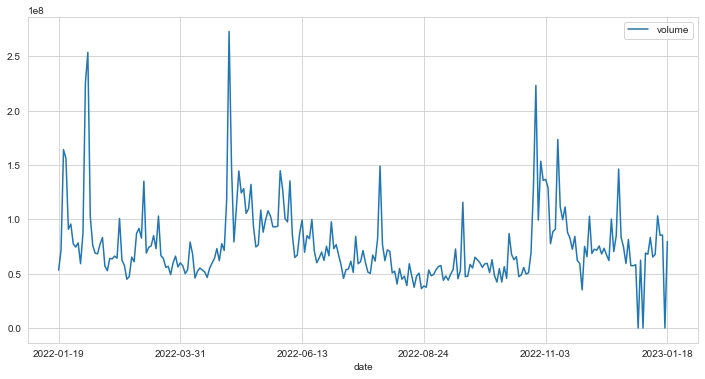

In [54]:
AMZN['volume'].plot(legend = True,figsize = (12,6))

Now that we've seen the visulazation for the closing price and the volume traded each day, let's go ahead and calculate the moving average for the stock

##### 'Moving Average - MA'
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [47]:
ma_day =[10,20,50]

for ma in ma_day:
    col_name = "MA for %s days" %(str(ma))
    AAPL[col_name] = pd.DataFrame.rolling(AAPL['close'],ma).mean()

In [48]:
AAPL.head(50)

,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days
date,,,,,,,,
2022-02-03,174.480,176.240,172.120,172.90,89418074,NaN,NaN,NaN
2022-02-04,171.680,174.100,170.680,172.39,82465400,NaN,NaN,NaN
2022-02-07,172.860,173.946,170.950,171.66,77251204,NaN,NaN,NaN
2022-02-08,171.730,175.350,171.430,174.83,74829217,NaN,NaN,NaN
2022-02-09,176.050,176.650,174.900,176.28,71285038,NaN,NaN,NaN
2022-02-10,174.140,175.480,171.550,172.12,90865899,NaN,NaN,NaN
2022-02-11,172.330,173.080,168.040,168.64,98670687,NaN,NaN,NaN
2022-02-14,167.370,169.580,166.560,168.88,86185530,NaN,NaN,NaN
2022-02-15,170.970,172.950,170.250,172.79,64286320,NaN,NaN,NaN


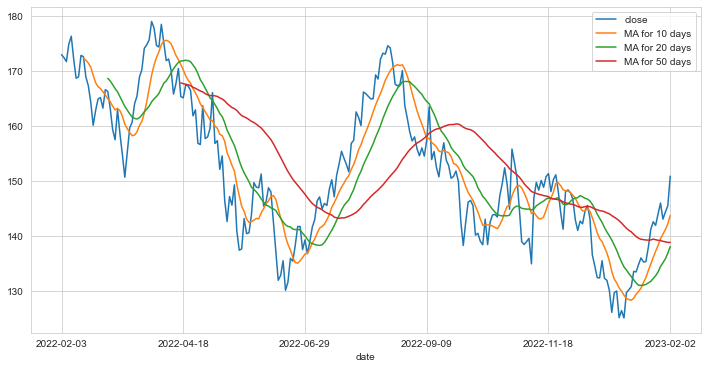

In [49]:
AAPL[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (12,6))
plt.show()

#### Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

In [50]:
# use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['close'].pct_change()

In [51]:
AAPL.head()

,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
date,,,,,,,,,
2022-02-03,174.48,176.240,172.12,172.90,89418074,NaN,NaN,NaN,NaN
2022-02-04,171.68,174.100,170.68,172.39,82465400,NaN,NaN,NaN,-0.002950
2022-02-07,172.86,173.946,170.95,171.66,77251204,NaN,NaN,NaN,-0.004235
2022-02-08,171.73,175.350,171.43,174.83,74829217,NaN,NaN,NaN,0.018467
2022-02-09,176.05,176.650,174.90,176.28,71285038,NaN,NaN,NaN,0.008294


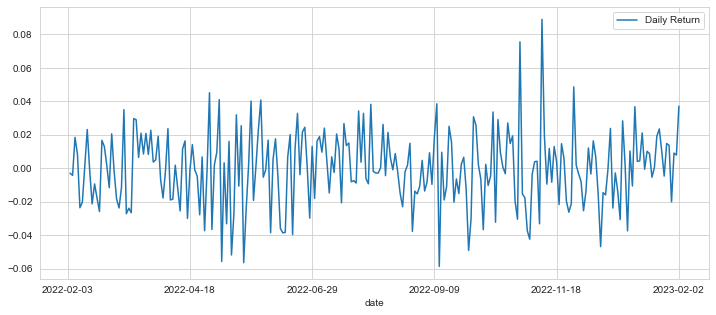

In [52]:
AAPL['Daily Return'].plot(figsize=(12,5), legend = True)
plt.show()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\Vipul\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


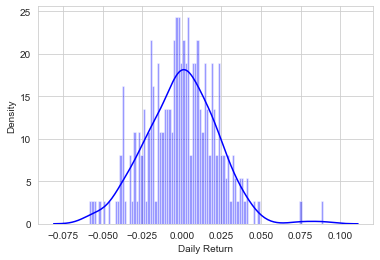

In [53]:
sns.distplot(AAPL['Daily Return'].dropna(),bins =100, color = 'blue')
plt.show()

Now want to analyze the returns of all the stocks in our list. Let's go ahead and build a DataFrame with all the ['close'] columns for each of the stocks dataframes.

In [54]:
closing_df1 = pd.DataFrame(AAPL['close'])
close1 = closing_df1.rename(columns = {"close": "AAPL_close"})

closing_df2 = pd.DataFrame(GOOG['close'])
close2 = closing_df2.rename(columns = {"close": "GOOG_close"})

closing_df3 = pd.DataFrame(MSFT['close'])
close3 = closing_df3.rename(columns = {"close": "MSFT_close"})

closing_df4 = pd.DataFrame(AMZN['close'])
close4 = closing_df4.rename(columns = {"close": "AMZN_close"})

closing_df = pd.concat([close1,close2,close3,close4],axis = 1)
closing_df.head()

,AAPL_close,GOOG_close,MSFT_close,AMZN_close
date,,,,
2022-02-03,172.90,142.6505,301.25,138.846
2022-02-04,172.39,143.0160,305.94,157.640
2022-02-07,171.66,138.9380,300.95,157.936
2022-02-08,174.83,139.2130,304.56,161.414
2022-02-09,176.28,141.4530,311.21,161.190


## Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.

In [60]:
# Make a new tech returns DataFrame
tech_returns = closing_df.pct_change()
tech_returns

,AAPL_close,GOOG_close,MSFT_close,AMZN_close
date,,,,
2022-02-03,NaN,NaN,NaN,NaN
2022-02-04,-0.002950,0.002562,0.015568,0.135359
2022-02-07,-0.004235,-0.028514,-0.016310,0.001878
2022-02-08,0.018467,0.001979,0.011995,0.022022
2022-02-09,0.008294,0.016090,0.021835,-0.001388
...,...,...,...,...
2023-01-27,0.013684,0.015631,0.000645,0.030437
2023-01-30,-0.020078,-0.027405,-0.021962,-0.016530
2023-01-31,0.009021,0.019602,0.021013,0.025858


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

C:\Users\Vipul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


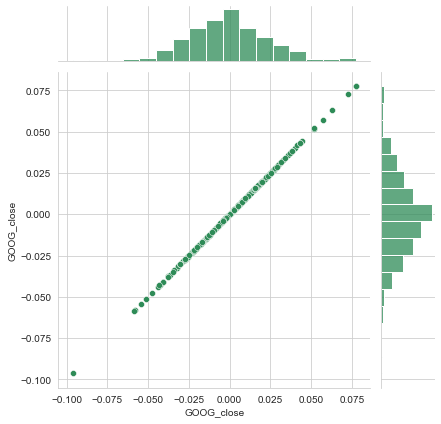

In [56]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG_close','GOOG_close',tech_returns,kind='scatter',color = 'seagreen')
plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

C:\Users\Vipul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


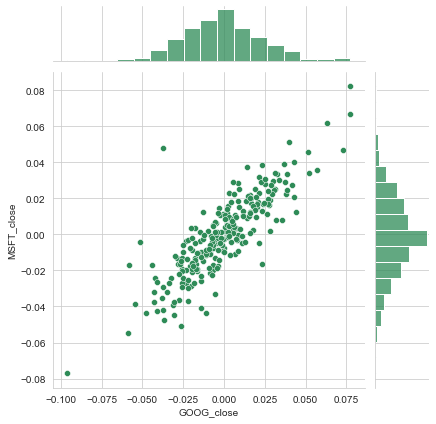

In [57]:
sns.jointplot('GOOG_close','MSFT_close',tech_returns,kind='scatter',color = 'seagreen')
plt.show()

Python's Seaborn and pandas packages make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot.

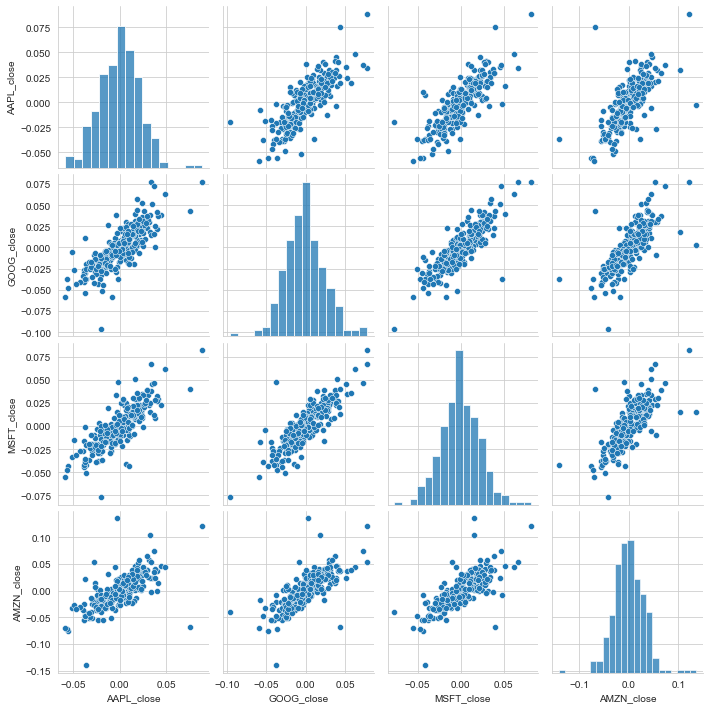

In [58]:
sns.pairplot(tech_returns.dropna())
plt.show()

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

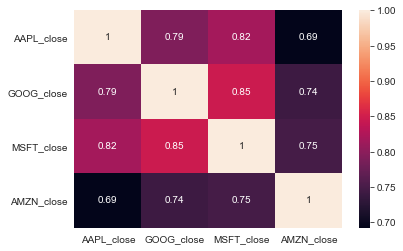

In [59]:
corr = tech_returns.dropna().corr()

sns.heatmap(corr,annot = True)
plt.show()

This means for every initial stock you purchase, you are putting about $37.38 at risk 99% of the time from our Monte Carlo Simulation.

C:\Users\Vipul\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


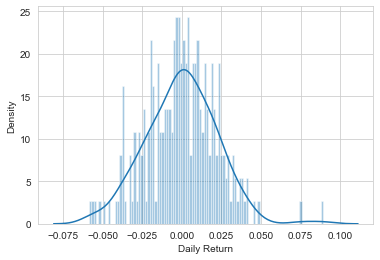

In [61]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)
plt.show()